<a href="https://colab.research.google.com/github/fgprevito/building-intuition/blob/main/Introduction_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are few things which we know which aren't capable of being reduced to a mathematical reasoning. And when they cannot, it is a sign that our knowldge of them is very small and confused. Where a math reasoning can be had, it is a great folly to make use of any other type of reasoning, as that would be like groping for a thing in the dark when you have a candle standing by you.

GOAL: Think in a high quality way


---


To think in a high quality = be able to process reality mathematically

The assignment I have been given to be able to train/demonstrate my ability to think in a high quality way is to analyze some economic data I have scraped from the web

That said, I recognize that I have a bias heading into this. I haven't gone through the entire process before. I don't actually know what comes after I do this, I only have a vague understanding. This fact may affect my thinking process and how I interpret results and processes

The first step to understanding this economic data is to see if I REALLY understand it. Can I reduce my understanding to mathematical reasoning? In other words, can I mathematically generate the data in a way that simulates reality reasonably well, in a way that I can easily manipulate in order to stress test for events that could affect my inputs/outputs?

---

So, I want to prove I understand the data by mathematically reconstructing it. How do I go about this? Well we are going to try and understand it as something linear for now, in other words, the simplest mathematical expression we can find to try and express our knowledge of the world. So how do I go about doing this?

Let's look at what I intuitively know about my data right now...


---


Result: I want to be able to predict some kind of financial output (stock price, net income, etc). The important thing to keep in mind is the nature of the data and in any case, it's going to be some kind of continuous output

Inputs: The data I want to be able to predict the financial output with, for now, are 3 categorical variables that consist of:

  1: the company

  2: the year

  3: the sector


Summary:
I am trying to predict a continuous variable using 3 categorical variables and I am assuming for now the relationship is something linear.

So I am dealing with (lets say) stock price data as it is affected by 3 factors: The company, the year, and the sector

- I'll need to generate data for each of these factors
  - The company, year, and sector data are all categorical variables
  - Stock price data is a continuous variable

With this in mind, I will create a list for the company variable, and test a simple linear regression with 1 input and 1 output, the reason being so that I can begein with the simplest expression through which I can understand the problem at hand, and expanding from there. So, afterwards I will add in more factors for a multiple linear regression.

In [ ]:
# importing the bare minimum required libraries in order to perform math operations and plot results

import numpy
from matplotlib import pyplot

In [ ]:
# setting up some constants that I can change to easily test my models/data with

NOISE = 0
START_YEAR = 2017
NUM_YEARS = 5

In [ ]:
# Creating a list of companies and then putting the list into a data dictionary in key-value pairs

company = ['Apple', 'Microsoft', 'Exxon', 'Shell', 'Novartis', 'Merck']
co_map = {x:ii for (ii,x) in enumerate(company)}
co_map

{'Apple': 0, 'Microsoft': 1, 'Exxon': 2, 'Shell': 3, 'Novartis': 4, 'Merck': 5}

I have my input variable now

Before analyzing my data I want to prove I understand my data by recreating it, while assuming the relationship is something linear. But what does it mean to have a linear relationship? How does that affect my output, for it to be linearly correlated with my input?

In order to answer this question I'm going to meticulously control the creation of this experiment and test it at various points by changing its parts to see how that affects my experiment, and how different features relate to each other.

To start this process off, I'm going to build a design matrix, then I will identify how the variables relate to each other and then using this analysis, I will try to calculate the relationship the variables have with each other and see if I can recover my data, as a way to test that I correctly understand the relationship

The design matrix will describe the 'design' of this experiment. It explains the outputs in terms of the inputs, and it structures the data in such a way that I can understand how input relate to each other

In [ ]:
# Creating a list called acc, then filling the list with zeros and iterating
# through each row, selecting one of the companies for each row

acc = []

for yy in range(START_YEAR, START_YEAR + NUM_YEARS):
  for c in company:
      new_row = numpy.zeros((len(company), ))
      new_row[co_map[c]] = 1
      acc.append(new_row)

design_matrix = numpy.vstack(acc)
design_matrix

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
# Looking at the shape of my matrix to understand my data better
# This will be more useful when I have large datasets where I can't count the rows and columns that easily

design_matrix.shape

(30, 6)

This next piece, 'actual weights' is going to simulate the true relationship company has with its stock price.

This is the relationship I am trying to find in my data using a linear regression

In reality, its probably impossible for me to actually know what this number is for a fact. This is here so I can test things like: how changing my formulas and variables affect how I view reality. How do events that tank my stock price change how my linear model's effectiveness? How close can I get to this number with the tools available in a linear regression? What stops me from being able to uncover this reality?

In [ ]:
# ESTIMATING THE COEFFICIENTS - this is the real relationship we are trying to understand

actual_weights = numpy.random.rand(design_matrix.shape[1])
actual_weights

array([0.25593696, 0.1571193 , 0.74074853, 0.5224035 , 0.99585655,
       0.18432385])

These next 2 code blocks will generate what represents the response variable, in this cas: 'stock price'. These are the observation I will use to help train my linear model so that I can recover the true relationship company has with stock price.

These would be like the historical stock price data I use to train my model

In [ ]:
outcomes = numpy.dot(design_matrix, actual_weights)
outcomes

array([0.25593696, 0.1571193 , 0.74074853, 0.5224035 , 0.99585655,
       0.18432385, 0.25593696, 0.1571193 , 0.74074853, 0.5224035 ,
       0.99585655, 0.18432385, 0.25593696, 0.1571193 , 0.74074853,
       0.5224035 , 0.99585655, 0.18432385, 0.25593696, 0.1571193 ,
       0.74074853, 0.5224035 , 0.99585655, 0.18432385, 0.25593696,
       0.1571193 , 0.74074853, 0.5224035 , 0.99585655, 0.18432385])

In [ ]:
outcomes += (numpy.random.rand(outcomes.shape[0]) - .5) * NOISE
outcomes

array([0.25593696, 0.1571193 , 0.74074853, 0.5224035 , 0.99585655,
       0.18432385, 0.25593696, 0.1571193 , 0.74074853, 0.5224035 ,
       0.99585655, 0.18432385, 0.25593696, 0.1571193 , 0.74074853,
       0.5224035 , 0.99585655, 0.18432385, 0.25593696, 0.1571193 ,
       0.74074853, 0.5224035 , 0.99585655, 0.18432385, 0.25593696,
       0.1571193 , 0.74074853, 0.5224035 , 0.99585655, 0.18432385])

Ordinary Least Squares

Now I am going to try and find the best possible value for my regression weights by finding the weights that create a line that most reduces the error between my regression equation and each outcome observation.

This next section of code blocks simulates me using the data I know, which are the stock prices + the names of the companies those prices belong to, in order to predict what the relationship between the 2 could be with the least amount of error possible.

Each of these code blocks help visualize the calculations that are being made to
 find this point

In [ ]:
# transpose of my design matrix

design_matrix.T

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.]])

The covariance matrix

This summarizes the variance and covariance of my features

The diagonal represents the variance of each variable (how spread out they are)

Anything off the diagonal represents the covariances between each pair of variables. I'll get into this more later when I add in more variables. For now there's only 1 variable so there's nothing for it to be covariant with, but it can identify the variance of my single variable (company) which is 2


---



---


* Look into how covariance matrix can rotate any vector into direction of greatest variance by mutliplying covariance matrix with a vector v
* supposedly it is important to check the vector with greatest variance bc its a proxy/indicator for causation. For x to be a cause for y, change/variation in x leads to change in y. Variability also relates to effect size

In [ ]:
# Covariance matrix

# 1 means the value is correleated with the diagonal element

covariance = numpy.dot(design_matrix.T, design_matrix)
covariance

array([[5., 0., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0., 0.],
       [0., 0., 5., 0., 0., 0.],
       [0., 0., 0., 5., 0., 0.],
       [0., 0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 0., 5.]])

The precision matrix

This is the inverse of the covariance matrix

A straightforward observation we get from here is, if the diagonal represented the variance of each variable in the covariance matrix, the inverse of this measure would be the precision of each variable. In other words, if variance measure show spread out the variables are, this would measure how tightly clustered those variables are around the mean. So obviously if the variance was large, precision would decrease, and vice versa.

For the off diagonals

Precision matrix is a little more intuitive, but gives a lot of the same information





In [ ]:
# Precision matrix

# Negative values can imply the model is ill conditioned
# These values represent total amount of variance that can be explained by given pricnipal component
# Therefor if the value is positive tis implies some of the variance can be explained

precision = numpy.linalg.pinv(numpy.dot(design_matrix.T, design_matrix))
precision

array([[0.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2]])

The hat matrix

This helps us to identify outlying observations

We use a moore-penrose pseudoinverse because it can handle situations where a matrix isn't full rank. If we just used the inverse, it'd be less versatile and we would need a matrix that is full rank. I'll talk more about inverse vs pseudoinverse and matrix rank later once we start dealing with multivariate matrices

For now, THINK: WHAT CAN WE TELL FROM THESE VALUES? WHAT DO THEY MEAN?


In [ ]:
# Hat Matrix/Projection matrix

numpy.dot(numpy.linalg.pinv(numpy.dot(design_matrix.T, design_matrix)), design_matrix.T)

array([[0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2,
        0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0. ,
        0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. ,
        0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2,
        0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. ,
        0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. ,
        0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. ,
        0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. ,
        0. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. ,
        0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. ,
        0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0. ,
        0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. ,

By taking the dot product of the hat matrix and the outcome observations, we come to our ordinary least squares estimate for the regression weights. In other words, my best guess at how the input variables relate to my output variables.

In the scenario where I don't have to deal with any noise in my outcome variables (which is totally not realistic but just keeping it simple for now), I can see I have perfect capability to predict the true regression weights. What can I extrapolate from this? Perhaps, if I can identify variables that aren't strongly influenced by various outside, I should be able to capture a very accurate approximation on the mathematic relationship between a linear regression input and output

In [ ]:
# ESTIMATING THE COEFFICIENTS - here we try to estimate the real weights of the inputs

pred_weights = numpy.dot(numpy.dot(numpy.linalg.pinv(numpy.dot(design_matrix.T, design_matrix)), design_matrix.T), outcomes)
pred_weights

array([0.25593696, 0.1571193 , 0.74074853, 0.5224035 , 0.99585655,
       0.18432385])

Creating a plot to visualize the difference between the weights i predicted and the actual weights. The intercept is at x = 0 to make bookkeeping easier and I designed the experiment to assume the relationship is a positive linear relationship so that's the reason for the y = .5x line.

If the predicted weights match the actual weights they should all line up on the red y = .5x line

Text(0, 0.5, 'Predicted Weights')

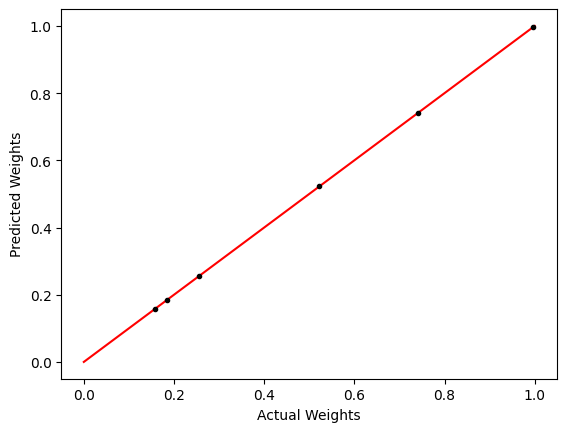

In [ ]:
pyplot.plot([0,1], [0,1], 'r-')
pyplot.plot(actual_weights, pred_weights, 'k.')

pyplot.xlabel('Actual Weights')
pyplot.ylabel('Predicted Weights')

Now, using the weights I predicted, I try to predict future outcomes variables. In this case, I can perfectly predict them because I dont have to deal with any noise and I know that I have perfectly predicted my weights.

But what if I did add some noise to this system? Would more data observation help counteract the affect noise has on predictability?

In [ ]:
pred_outcomes = numpy.dot(design_matrix, pred_weights)
pred_outcomes

array([0.25593696, 0.1571193 , 0.74074853, 0.5224035 , 0.99585655,
       0.18432385, 0.25593696, 0.1571193 , 0.74074853, 0.5224035 ,
       0.99585655, 0.18432385, 0.25593696, 0.1571193 , 0.74074853,
       0.5224035 , 0.99585655, 0.18432385, 0.25593696, 0.1571193 ,
       0.74074853, 0.5224035 , 0.99585655, 0.18432385, 0.25593696,
       0.1571193 , 0.74074853, 0.5224035 , 0.99585655, 0.18432385])

Perhaps a little bit but it doesn't seem like more data is the solution to dealing with noise in my system

residual sum of squares tells me how much my predicted outcomes deviated from the actual outcomes. In this experimental case, it's a good way for me to test accuracy of my model but in reality, I dont truly know the future outcomes.

All this measure can truly tell me is how close my predictions are to the outcome data I use to train my model. In reality, this measure is effectively a measure of model fit. If the RSS value is too close to 0, its incredibly likely my model has overfit to the training data, and I will need to smooth my regression in some way to better represent the true relationship between the input and output variables, and not just the input variable to the current dataset.

In [ ]:
# ASSESS ACCURACY OF ESTIMATES
# this tells us on average, how much did our prediction of the response var deviate from the true response var

rss = numpy.mean((pred_outcomes - outcomes)**2)
rss

2.0543252740130515e-33

This next part I'm taking the average error of the regression weights I was able to estimate from the actual weights. Basically this tells me how much do my model weights deviate from the real weights on averaege. In reality, I can't make this calculations because I wouldn't know what my real weights are.

For now it's a good exercise tho in, given whatever conditions, how well did my model understand the reality of the situation? How much noise makes this calculation infeasible? Does more data help in noisy conditions? How much of the error rate can I just not predict because due to the nature of chaos, it is intrinsically impossible to predict?

In [ ]:
# we are talking economics right now, so all these numbers are currency
# in this case, dollar for dollar, if i estimate one parameter incorrectly, how much is the average error?
# how well did i recover the real relationship?

numpy.mean(actual_weights - pred_weights)

-1.850371707708594e-17

In [ ]:
# If my model is giving me back my data, these should be similar (close to 0)
# more noise means more variance
# variance is squared difference from the mean

numpy.var(actual_weights - pred_weights)

1.7119377283442097e-33

This last piece, standard deviation, tells me the same information as variance but is a bit more intuitive to read.

What I just did here, was I decomposed the evaluation of my understanding of the relationship between my input company, and output stock price, into 3 parts:

1: Error that is intrinsically impossible to predict

2: Approximation bias: The simplifying assumption made by the model to make it easier to predict future data

3: Variance: How sensitive the model is to new data points

We can't really do anything about the intrinsic error, but we can affect bias and variance, with the goal being to reduce them as much as possible. However, there eventually comes a point where we must choose one or the other. If we reduce variance too much, our model becomese incredibly biased towards the current dataset and we will have failed in our mission to mathematically understand the **relationship** between the features. If we reduce the bias of the model too much, it won't be sensitive to any changes in data in an attempt to simplify the model

Note: I can't actually decompose the error inot these components into bias and variance in reality because I wouldnt know the true function. This is just good for understanding's sake

In [ ]:
# square root of variance
# more intuitive because its in same units as original data
# AKA the difference between actual and pred weights has standard dev of (whatever the output is)

numpy.std(actual_weights - pred_weights)

4.1375569220787883e-17

Cool. That all said...

Now I will try adding in another variable, namely year

In [ ]:
# Creating a list of years and then putting the list into a data dictionary in key-value pairs

year = numpy.arange(START_YEAR, START_YEAR+NUM_YEARS)
year_map = {x:ii for (ii,x) in enumerate(year)}
year_map

{2017: 0, 2018: 1, 2019: 2, 2020: 3, 2021: 4}

In [ ]:
# Remaking the design matrix to include year

acc = []

for yy in range(START_YEAR, START_YEAR + NUM_YEARS):
  for c in company:
      new_row = numpy.zeros((len(company) + len(year), ))
      new_row[co_map[c]] = 1
      new_row[year_map[yy] + len(company)] = 1
      acc.append(new_row)

design_matrix = numpy.vstack(acc)
design_matrix

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.

In [ ]:
design_matrix.shape

(30, 11)

Now we calculate matrix rank. And we have an interesting observation here. Once we added an extra variable, our matrix is now 'rank deficient'. It is not a fully ranked matrix.

So what? Why do I care?

Luckily we can use pseudoinverse to handle this type of thing but why does this happen and what does this mean? Well let's investigate...

reason rank deficiency isnt an issue with only 1 variable is becuase the problem
is derived from covariance

I've read sources saying the solution to matrix rank is more data?

In [ ]:
# Calculating the matrix rank

# matrix rank tells me the max number of linearly independent columns
# this number cannot exceed the number of columns

numpy.linalg.matrix_rank(design_matrix)

10

In [ ]:
# ESTIMATING THE COEFFICIENTS - this is the real relationship we are trying to understand

actual_weights = numpy.random.rand(design_matrix.shape[1])
actual_weights

array([0.74232418, 0.9329184 , 0.02756135, 0.28757317, 0.13199657,
       0.00659146, 0.37405174, 0.47130449, 0.03500188, 0.31969567,
       0.97933329])

In [ ]:
outcomes = numpy.dot(design_matrix, actual_weights)
outcomes

array([1.11637592, 1.30697014, 0.40161309, 0.66162491, 0.50604831,
       0.38064319, 1.21362867, 1.40422289, 0.49886584, 0.75887766,
       0.60330106, 0.47789595, 0.77732607, 0.96792028, 0.06256323,
       0.32257506, 0.16699846, 0.04159334, 1.06201985, 1.25261407,
       0.34725702, 0.60726885, 0.45169224, 0.32628713, 1.72165747,
       1.91225169, 1.00689464, 1.26690647, 1.11132986, 0.98592475])

In [ ]:
outcomes += (numpy.random.rand(outcomes.shape[0]) - .5) * NOISE
outcomes

array([1.11637592, 1.30697014, 0.40161309, 0.66162491, 0.50604831,
       0.38064319, 1.21362867, 1.40422289, 0.49886584, 0.75887766,
       0.60330106, 0.47789595, 0.77732607, 0.96792028, 0.06256323,
       0.32257506, 0.16699846, 0.04159334, 1.06201985, 1.25261407,
       0.34725702, 0.60726885, 0.45169224, 0.32628713, 1.72165747,
       1.91225169, 1.00689464, 1.26690647, 1.11132986, 0.98592475])

In [ ]:
# covariance matrix

numpy.dot(design_matrix.T, design_matrix)

array([[5., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 5., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 5., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 5., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 5., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 5., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 6., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 6., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 6., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 6., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 6.]])

In [ ]:
# precision matrix

numpy.linalg.pinv(numpy.dot(design_matrix.T, design_matrix))

array([[ 0.17355372, -0.02644628, -0.02644628, -0.02644628, -0.02644628,
        -0.02644628,  0.00826446,  0.00826446,  0.00826446,  0.00826446,
         0.00826446],
       [-0.02644628,  0.17355372, -0.02644628, -0.02644628, -0.02644628,
        -0.02644628,  0.00826446,  0.00826446,  0.00826446,  0.00826446,
         0.00826446],
       [-0.02644628, -0.02644628,  0.17355372, -0.02644628, -0.02644628,
        -0.02644628,  0.00826446,  0.00826446,  0.00826446,  0.00826446,
         0.00826446],
       [-0.02644628, -0.02644628, -0.02644628,  0.17355372, -0.02644628,
        -0.02644628,  0.00826446,  0.00826446,  0.00826446,  0.00826446,
         0.00826446],
       [-0.02644628, -0.02644628, -0.02644628, -0.02644628,  0.17355372,
        -0.02644628,  0.00826446,  0.00826446,  0.00826446,  0.00826446,
         0.00826446],
       [-0.02644628, -0.02644628, -0.02644628, -0.02644628, -0.02644628,
         0.17355372,  0.00826446,  0.00826446,  0.00826446,  0.00826446,
         0.008

In [ ]:
# hat matrix

numpy.dot(numpy.linalg.pinv(numpy.dot(design_matrix.T, design_matrix)), design_matrix.T)

array([[ 0.18181818, -0.01818182, -0.01818182, -0.01818182, -0.01818182,
        -0.01818182,  0.18181818, -0.01818182, -0.01818182, -0.01818182,
        -0.01818182, -0.01818182,  0.18181818, -0.01818182, -0.01818182,
        -0.01818182, -0.01818182, -0.01818182,  0.18181818, -0.01818182,
        -0.01818182, -0.01818182, -0.01818182, -0.01818182,  0.18181818,
        -0.01818182, -0.01818182, -0.01818182, -0.01818182, -0.01818182],
       [-0.01818182,  0.18181818, -0.01818182, -0.01818182, -0.01818182,
        -0.01818182, -0.01818182,  0.18181818, -0.01818182, -0.01818182,
        -0.01818182, -0.01818182, -0.01818182,  0.18181818, -0.01818182,
        -0.01818182, -0.01818182, -0.01818182, -0.01818182,  0.18181818,
        -0.01818182, -0.01818182, -0.01818182, -0.01818182, -0.01818182,
         0.18181818, -0.01818182, -0.01818182, -0.01818182, -0.01818182],
       [-0.01818182, -0.01818182,  0.18181818, -0.01818182, -0.01818182,
        -0.01818182, -0.01818182, -0.01818182,  0

In [ ]:
pred_weights = numpy.dot(numpy.dot(numpy.linalg.pinv(numpy.dot(design_matrix.T, design_matrix)), design_matrix.T), outcomes)
pred_weights

array([0.746908  , 0.93750221, 0.03214516, 0.29215699, 0.13658038,
       0.01117527, 0.36946792, 0.46672068, 0.03041807, 0.31511186,
       0.97474948])

Text(0, 0.5, 'Predicted Weights')

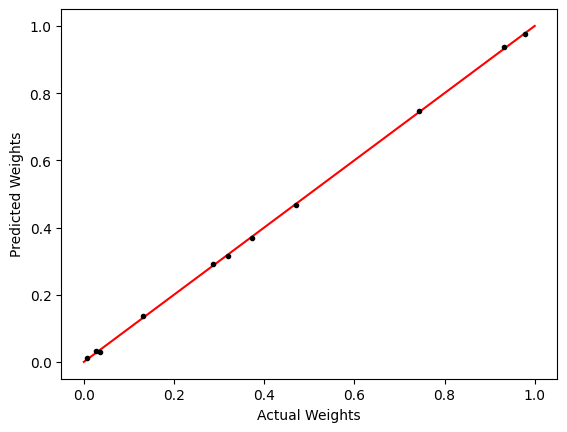

In [ ]:
pyplot.plot([0,1], [0,1], 'r-')
pyplot.plot(actual_weights, pred_weights, 'k.')

pyplot.xlabel('Actual Weights')
pyplot.ylabel('Predicted Weights')

Interesting. So what just happened here?

Well, it seems that even tho there's no noise, my actual and predicted weights aren't matching up. it appears the company and year variables now have their own respective intercepts, though the weights are correct.

But what caused this?

Well, this has to do with the effect that adding a second categorical variable has on a linear regressions ability to identify relationships.

If I cant determine what effect a variable has on its own on the output, it's then difficult for me to understand what the second variable adds to the table

In [ ]:
simple_design = design_matrix[:,:-1]
simple_design

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 

In [ ]:
simple_design.shape

(30, 10)

In [ ]:
numpy.linalg.matrix_rank(simple_design)

10

In [ ]:
actual_weights = numpy.random.rand(simple_design.shape[1])
actual_weights

array([0.63953441, 0.39201111, 0.64826133, 0.27227473, 0.77944913,
       0.18057068, 0.33946746, 0.15447574, 0.94125679, 0.86659309])

In [ ]:
outcomes = numpy.dot(simple_design, actual_weights)
outcomes

array([0.97900187, 0.73147857, 0.98772879, 0.61174219, 1.11891659,
       0.52003814, 0.79401014, 0.54648685, 0.80273706, 0.42675047,
       0.93392487, 0.33504642, 1.5807912 , 1.33326791, 1.58951812,
       1.21353153, 1.72070593, 1.12182748, 1.5061275 , 1.2586042 ,
       1.51485442, 1.13886782, 1.64604222, 1.04716377, 0.63953441,
       0.39201111, 0.64826133, 0.27227473, 0.77944913, 0.18057068])

In [ ]:
outcomes += (numpy.random.rand(outcomes.shape[0]) - .5) * NOISE
outcomes

array([0.97900187, 0.73147857, 0.98772879, 0.61174219, 1.11891659,
       0.52003814, 0.79401014, 0.54648685, 0.80273706, 0.42675047,
       0.93392487, 0.33504642, 1.5807912 , 1.33326791, 1.58951812,
       1.21353153, 1.72070593, 1.12182748, 1.5061275 , 1.2586042 ,
       1.51485442, 1.13886782, 1.64604222, 1.04716377, 0.63953441,
       0.39201111, 0.64826133, 0.27227473, 0.77944913, 0.18057068])

In [ ]:
# covariance

numpy.dot(simple_design.T, simple_design)

array([[5., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 5., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 5., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 5., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 5., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 5., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 6., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 6., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 6., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 6.]])

In [ ]:
# precision

numpy.linalg.pinv(numpy.dot(simple_design.T, simple_design))

array([[ 0.33333333,  0.13333333,  0.13333333,  0.13333333,  0.13333333,
         0.13333333, -0.16666667, -0.16666667, -0.16666667, -0.16666667],
       [ 0.13333333,  0.33333333,  0.13333333,  0.13333333,  0.13333333,
         0.13333333, -0.16666667, -0.16666667, -0.16666667, -0.16666667],
       [ 0.13333333,  0.13333333,  0.33333333,  0.13333333,  0.13333333,
         0.13333333, -0.16666667, -0.16666667, -0.16666667, -0.16666667],
       [ 0.13333333,  0.13333333,  0.13333333,  0.33333333,  0.13333333,
         0.13333333, -0.16666667, -0.16666667, -0.16666667, -0.16666667],
       [ 0.13333333,  0.13333333,  0.13333333,  0.13333333,  0.33333333,
         0.13333333, -0.16666667, -0.16666667, -0.16666667, -0.16666667],
       [ 0.13333333,  0.13333333,  0.13333333,  0.13333333,  0.13333333,
         0.33333333, -0.16666667, -0.16666667, -0.16666667, -0.16666667],
       [-0.16666667, -0.16666667, -0.16666667, -0.16666667, -0.16666667,
        -0.16666667,  0.33333333,  0.16666667

In [ ]:
# hat

numpy.dot(numpy.linalg.pinv(numpy.dot(simple_design.T, simple_design)), simple_design.T)

array([[ 1.66666667e-01, -3.33333333e-02, -3.33333333e-02,
        -3.33333333e-02, -3.33333333e-02, -3.33333333e-02,
         1.66666667e-01, -3.33333333e-02, -3.33333333e-02,
        -3.33333333e-02, -3.33333333e-02, -3.33333333e-02,
         1.66666667e-01, -3.33333333e-02, -3.33333333e-02,
        -3.33333333e-02, -3.33333333e-02, -3.33333333e-02,
         1.66666667e-01, -3.33333333e-02, -3.33333333e-02,
        -3.33333333e-02, -3.33333333e-02, -3.33333333e-02,
         3.33333333e-01,  1.33333333e-01,  1.33333333e-01,
         1.33333333e-01,  1.33333333e-01,  1.33333333e-01],
       [-3.33333333e-02,  1.66666667e-01, -3.33333333e-02,
        -3.33333333e-02, -3.33333333e-02, -3.33333333e-02,
        -3.33333333e-02,  1.66666667e-01, -3.33333333e-02,
        -3.33333333e-02, -3.33333333e-02, -3.33333333e-02,
        -3.33333333e-02,  1.66666667e-01, -3.33333333e-02,
        -3.33333333e-02, -3.33333333e-02, -3.33333333e-02,
        -3.33333333e-02,  1.66666667e-01, -3.33333333e-

In [ ]:
pred_weights = numpy.dot(numpy.dot(numpy.linalg.pinv(numpy.dot(simple_design.T, simple_design)), simple_design.T), outcomes)
pred_weights

array([0.63953441, 0.39201111, 0.64826133, 0.27227473, 0.77944913,
       0.18057068, 0.33946746, 0.15447574, 0.94125679, 0.86659309])

Text(0, 0.5, 'Predicted Weights')

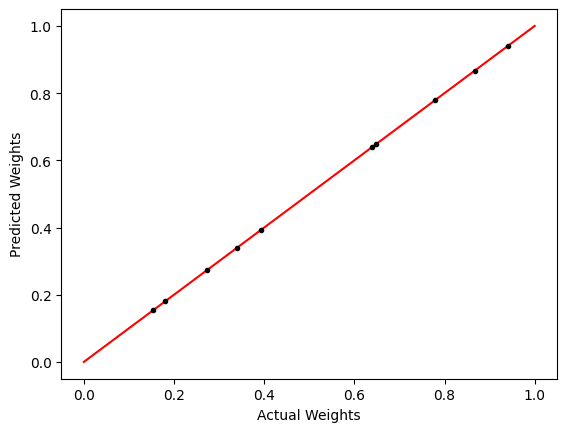

In [ ]:
pyplot.plot([0,1], [0,1], 'r-')
pyplot.plot(actual_weights, pred_weights, 'k.')

pyplot.xlabel('Actual Weights')
pyplot.ylabel('Predicted Weights')

In [ ]:
# Creating a list of sectors and then putting the list into a data dictionary in key-value pairs

sector = ['Tech', 'Energy', 'Pharma']
sector_map = {x:ii for (ii,x) in enumerate(sector)}
sector_map

{'Tech': 0, 'Energy': 1, 'Pharma': 2}

In [ ]:
company1 = ['Apple', 'Microsoft']
company2 = ['Exxon', 'Shell']
company3 = ['Novartis', 'Merck']
co_map1 = {x:ii for (ii,x) in enumerate(company1)}
co_map2 = {x:ii for (ii,x) in enumerate(company2)}
co_map3 = {x:ii for (ii,x) in enumerate(company3)}

In [ ]:
# Remaking the design matrix to include sector

acc = []

for yy in range(START_YEAR, START_YEAR + NUM_YEARS):
  for c in company:
      new_row = numpy.zeros((len(company) + len(year), ))
      new_row[co_map[c]] = 1
      new_row[year_map[yy] + len(company)] = 1
      acc.append(new_row)

design_matrix = numpy.vstack(acc)
design_matrix

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.

In [ ]:
axx = []

for yy in range(START_YEAR, START_YEAR + NUM_YEARS):
  for s in sector:
    new_row = numpy.zeros((len(company) + len(sector) + len(year), ))
    new_row[co_map[c]] = 1
    new_row[sector_map[s] + len(company)] = 1
    new_row[year_map[yy] + len(sector) + len(company)] = 1
    axx.append(new_row)

design_matrix2 = numpy.vstack(axx)
design_matrix2

KeyError: ignored